# Model Iterations:  Model 4

In this model I want to try building another CNN from scratch and iterate with data augmentation.

In [44]:
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, save_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

In [3]:
import datetime

original_start = datetime.datetime.now()
start = datetime.datetime.now()

parent_dir = '../../'

In [4]:
train_dir = parent_dir + 'data/seg_train/'
test_dir = parent_dir + 'data/seg_test/'
val_dir = parent_dir + 'data/seg_val/'

Rescale images and create data generators

In [5]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (256, 256), batch_size = 32)

validation_generator = val_datagen.flow_from_directory(val_dir, target_size = (256, 256), batch_size = 32)

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256, 256), batch_size=32)

Found 11237 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


## Build Model 5:  CNN (same as model 4 in 04_MODELLING notebook)

In [6]:
model5 = Sequential()

# input
model5.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu', input_shape = (256, 256, 3), data_format = "channels_last"))
model5.add(MaxPooling2D((2, 2)))

# hidden layers 
model5.add(Conv2D(128, (3, 3), activation = 'relu'))
model5.add(MaxPooling2D((2, 2)))

model5.add(Conv2D(256, (3, 3), activation = 'relu'))
model5.add(MaxPooling2D((2, 2)))

model5.add(Conv2D(256, (3, 3), activation = 'relu'))
model5.add(MaxPooling2D((2, 2)))

model5.add(Conv2D(128, (3, 3), activation = 'relu'))
model5.add(MaxPooling2D((2, 2)))

# flatten layer
model5.add(Flatten())

# dense hidden layer
model5.add(Dense(512, activation = 'relu'))

# output layer
model5.add(Dense(6, activation = 'softmax'))

In [7]:
# compile
model5.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])

Steps per epoch and validation steps are typically the ceiling of `num_samples / batch size` which in this case is 350 and 87 respectively (I ended up aborting this because it was taking too long).  I'm sticking with 25 epochs for this model since model 3.1 showed significant overfitting at this point with this same batch size.  So I want to see if adding more layers helps with the overfitting before I try regularisation.  

In [8]:
start = datetime.datetime.now()

In [9]:
# fit model
results5 = model5.fit_generator(train_generator, steps_per_epoch = 100, epochs = 25, 
                                validation_data = validation_generator, validation_steps = 50)

Epoch 1/25
100/100 [==============================] - 847s 8s/step - loss: 1.3879 - accuracy: 0.4337 - val_loss: 1.0285 - val_accuracy: 0.5319
Epoch 2/25
100/100 [==============================] - 828s 8s/step - loss: 1.1040 - accuracy: 0.5625 - val_loss: 0.9526 - val_accuracy: 0.5819
Epoch 3/25
100/100 [==============================] - 822s 8s/step - loss: 0.9662 - accuracy: 0.6025 - val_loss: 0.9987 - val_accuracy: 0.6237
Epoch 4/25
100/100 [==============================] - 821s 8s/step - loss: 0.9153 - accuracy: 0.6234 - val_loss: 0.8258 - val_accuracy: 0.6102
Epoch 5/25
100/100 [==============================] - 823s 8s/step - loss: 0.8737 - accuracy: 0.6441 - val_loss: 0.7521 - val_accuracy: 0.6450
Epoch 6/25
100/100 [==============================] - 816s 8s/step - loss: 0.8277 - accuracy: 0.6596 - val_loss: 0.6772 - val_accuracy: 0.7021
Epoch 7/25
100/100 [==============================] - 823s 8s/step - loss: 0.7986 - accuracy: 0.6941 - val_loss: 0.7476 - val_accuracy: 0.7119

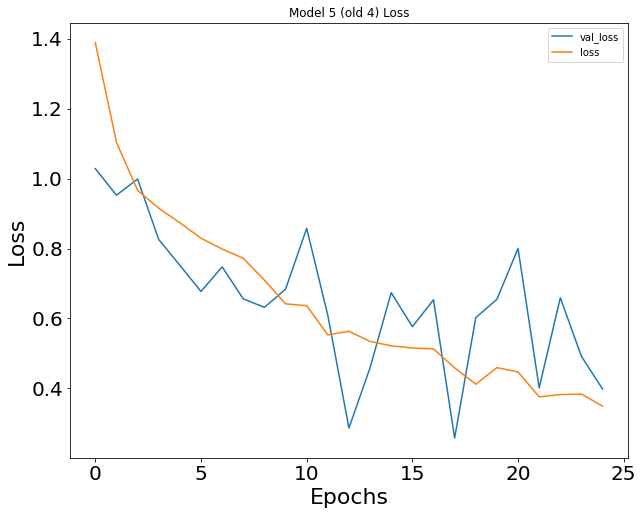

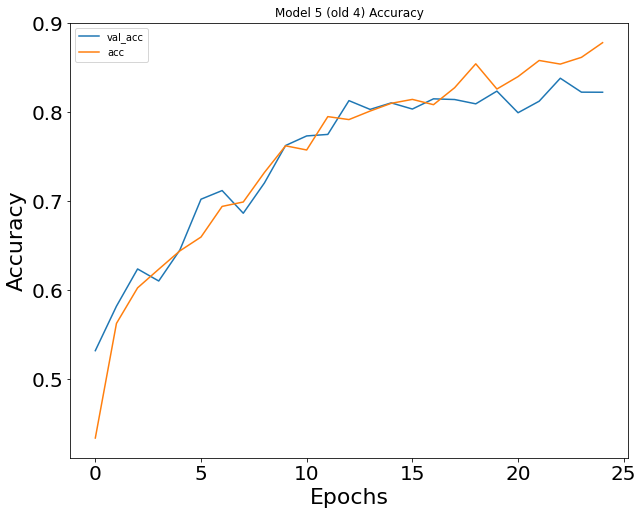

In [12]:
history = results5.history
plt.figure(figsize = (10, 8))
plt.plot(history['val_loss'])
plt.plot(history['loss'])
plt.legend(['val_loss', 'loss'])
plt.title('Model 5 (old 4) Loss')
plt.xlabel('Epochs', fontsize = 22)
plt.ylabel('Loss', fontsize = 22)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.savefig(parent_dir + 'figures/model4_rerun_loss')
plt.show();

plt.figure(figsize = (10, 8))
plt.plot(history['val_accuracy'])
plt.plot(history['accuracy'])
plt.legend(['val_acc', 'acc'])
plt.title('Model 5 (old 4) Accuracy')
plt.xlabel('Epochs', fontsize = 22)
plt.ylabel('Accuracy', fontsize = 22)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.savefig(parent_dir + 'figures/model4_rerun_accuracy')
plt.show();

In [13]:
end = datetime.datetime.now()
elapsed = end - start
print('Training Model 5 took a total of {}'.format(elapsed))

Training Model 5 took a total of 9:42:38.575448


In [16]:
save_model(model5, filepath = parent_dir + 'models/model5_old4', overwrite = True, include_optimizer = True)

### Evaluate

In [18]:
test_loss, test_acc = model5.evaluate_generator(test_generator, steps=50)
train_loss, train_acc = model5.evaluate_generator(train_generator, steps = 50)

print(f'Training Loss and Accuracy:  {train_loss}, {train_acc}')
print(f'Test Loss and Accuracy:  {test_loss}, {test_acc}')

Training Loss and Accuracy:  0.2526685297489166, 0.8887500166893005
Test Loss and Accuracy:  0.34555625915527344, 0.8100000023841858


## Model 6:  More layers, less nodes

In [40]:
model6 = Sequential()

# input
model6.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (256, 256, 3), data_format = "channels_last"))
model6.add(MaxPooling2D((2, 2)))

# hidden layers 
model6.add(Conv2D(32, (3, 3), activation = 'relu', kernel_regularizer = 'l2'))
model6.add(MaxPooling2D((2, 2)))

model6.add(Conv2D(64, (3, 3), activation = 'relu', kernel_regularizer = 'l2'))
model6.add(MaxPooling2D((2, 2)))

model6.add(Conv2D(64, (3, 3), activation = 'relu', kernel_regularizer = 'l2'))
model6.add(MaxPooling2D((2, 2)))

model6.add(Conv2D(64, (3, 3), activation = 'relu', kernel_regularizer = 'l2'))
model6.add(MaxPooling2D((2, 2)))

model6.add(Conv2D(32, (3, 3), activation = 'relu', kernel_regularizer = 'l2'))
model6.add(MaxPooling2D((2, 2)))


# flatten layer
model6.add(Flatten())

# dense hidden layer
model6.add(Dense(128, activation = 'relu'))

# output layer
model6.add(Dense(6, activation = 'softmax'))

In [41]:
# compile
model6.compile(loss = 'categorical_crossentropy', optimizer = "RMSprop", metrics = ['accuracy'])

Steps per epoch and validation steps are typically the ceiling of `num_samples / batch size` which in this case is 350 and 87 respectively (I ended up aborting this because it was taking too long).  I'm sticking with 25 epochs for this model since model 3.1 showed significant overfitting at this point with this same batch size.  So I want to see if adding more layers helps with the overfitting before I try regularisation.  

In [42]:
start = datetime.datetime.now()

In [45]:
# fit model
callback = EarlyStopping(patience = 5)
results6 = model6.fit_generator(train_generator, steps_per_epoch = 50, epochs = 40, 
                                validation_data = validation_generator, validation_steps = 50, callbacks = [callback])

Epoch 1/40
50/50 [==============================] - 105s 2s/step - loss: 2.6468 - accuracy: 0.2306 - val_loss: 1.7472 - val_accuracy: 0.4281
Epoch 2/40
50/50 [==============================] - 103s 2s/step - loss: 1.6806 - accuracy: 0.4200 - val_loss: 1.6285 - val_accuracy: 0.4610
Epoch 3/40
50/50 [==============================] - 102s 2s/step - loss: 1.4782 - accuracy: 0.4730 - val_loss: 1.9549 - val_accuracy: 0.3775
Epoch 4/40
50/50 [==============================] - 104s 2s/step - loss: 1.4320 - accuracy: 0.4900 - val_loss: 1.2651 - val_accuracy: 0.5145
Epoch 5/40
50/50 [==============================] - 103s 2s/step - loss: 1.3301 - accuracy: 0.5231 - val_loss: 1.1458 - val_accuracy: 0.5606
Epoch 6/40
50/50 [==============================] - 103s 2s/step - loss: 1.2844 - accuracy: 0.5550 - val_loss: 1.2771 - val_accuracy: 0.5661
Epoch 7/40
50/50 [==============================] - 104s 2s/step - loss: 1.2493 - accuracy: 0.5462 - val_loss: 1.1376 - val_accuracy: 0.5431
Epoch 8/40
50

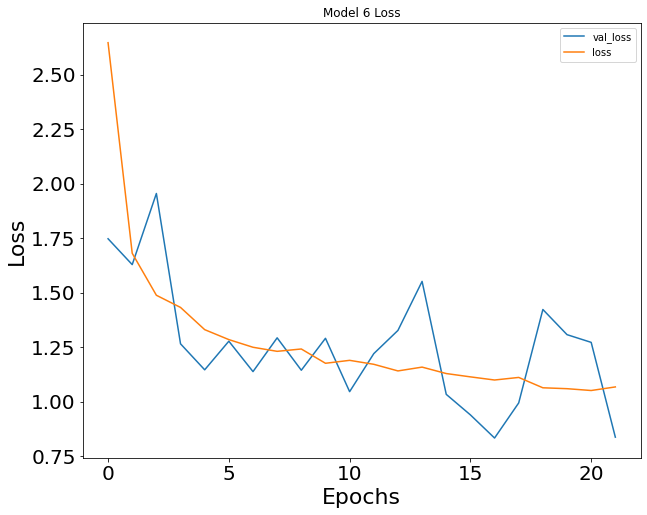

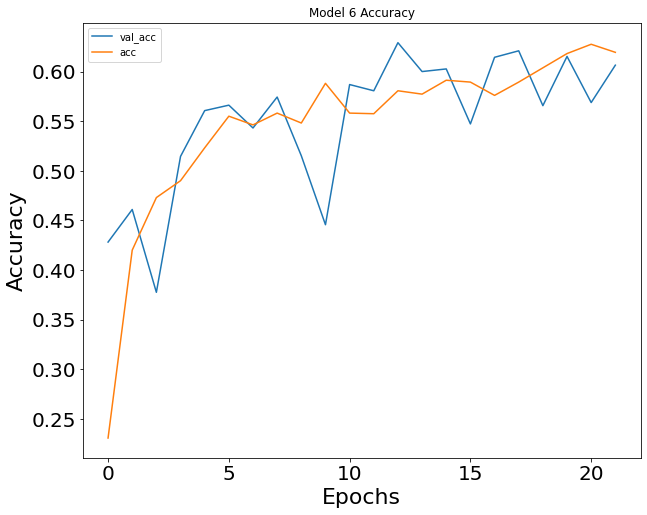

In [46]:
history = results6.history
plt.figure(figsize = (10, 8))
plt.plot(history['val_loss'])
plt.plot(history['loss'])
plt.legend(['val_loss', 'loss'])
plt.title('Model 6 Loss')
plt.xlabel('Epochs', fontsize = 22)
plt.ylabel('Loss', fontsize = 22)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.savefig(parent_dir + 'figures/model6_loss')
plt.show();

plt.figure(figsize = (10, 8))
plt.plot(history['val_accuracy'])
plt.plot(history['accuracy'])
plt.legend(['val_acc', 'acc'])
plt.title('Model 6 Accuracy')
plt.xlabel('Epochs', fontsize = 22)
plt.ylabel('Accuracy', fontsize = 22)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.savefig(parent_dir + 'figures/model6_accuracy')
plt.show();

In [47]:
end = datetime.datetime.now()
elapsed = end - start
print('Training Model 6 took a total of {}'.format(elapsed))

Training Model 6 took a total of 0:38:34.135428


In [48]:
save_model(model6, filepath = parent_dir + 'models/model6', overwrite = True, include_optimizer = True)

### Evaluate

In [49]:
test_loss6, test_acc6 = model6.evaluate_generator(test_generator, steps=50)
train_loss6, train_acc6 = model6.evaluate_generator(train_generator, steps = 50)

print(f'Training Model 6 Loss and Accuracy:  {train_loss6}, {train_acc6}')
print(f'Test Model 6 Loss and Accuracy:  {test_loss6}, {test_acc6}')

Training Model 6 Loss and Accuracy:  0.9732989072799683, 0.6175000071525574
Test Model 6 Loss and Accuracy:  1.2543243169784546, 0.596875011920929
